# Radiation Patterns in LiDAR Phased Arrays
MIT 6.S976: Silicon Photonics HW9. Written by Shoumik Chowdhury (@shoumikdc)

In [1]:
""" Import Relevant Packages """
import numpy as np
import h5py
import matplotlib.pyplot as plt

""" Useful Constants"""
π = np.pi; nm = 1; μm = 1000; # base unit is nm here

We define the phased array gain $G(\phi, \theta, \psi)$ as follows. 
$$ G = \frac{\sin^2[N(\psi + ka\cos(\phi)) / 2]}{\sin^2[(\psi + ka\cos(\phi)) / 2]}$$
where $k = 2\pi / \lambda$. Note that when $a$ is a multiple of $\lambda$, then $\lambda$ drops out of the expression above. For example, if $a = \lambda / 2$, then $ka = \pi$.

In [2]:
def G_dB(ϕ, N, ka = π, ψ = 0, θ = π/2):
    """
    Phased array gain G in dB. Here ka = k * a = (2π/λ) * (λ/2) = π by default, but we can change this. 
    We return G_dB = 10log(G / G_max), where the term in parentheses is the normalized gain.
    """
    G = np.sin((N/2) * (ψ + ka * np.cos(ϕ)))**2 / np.sin((1/2) * (ψ + ka * np.cos(ϕ)))**2

    return 10 * np.log(G / np.max(G))


def calc_FWHM(ϕ_vals, G_vals, FWHM_dB = -3):
    """
    Method to calculate the full-width at half-maximum Δϕ from a sweep of G_vals (Y-axis) vs.
    ϕ_vals (X-axis). We use -3dB as the threshold for "half maximum"
    """
    # Get indices of the two smallest values of the array
    idx1, idx2 = np.argpartition(np.abs(G_vals - FWHM_dB), 2)[:2]

    Δϕ = ϕ_vals[idx1] - ϕ_vals[idx2]
    
    return np.abs(Δϕ) # return absolute value to ensure positivity


### (a): Effect of Number of Antenna Elements $N$

N = 32: 0.037699111843077615
N = 128: 0.00942477796076946


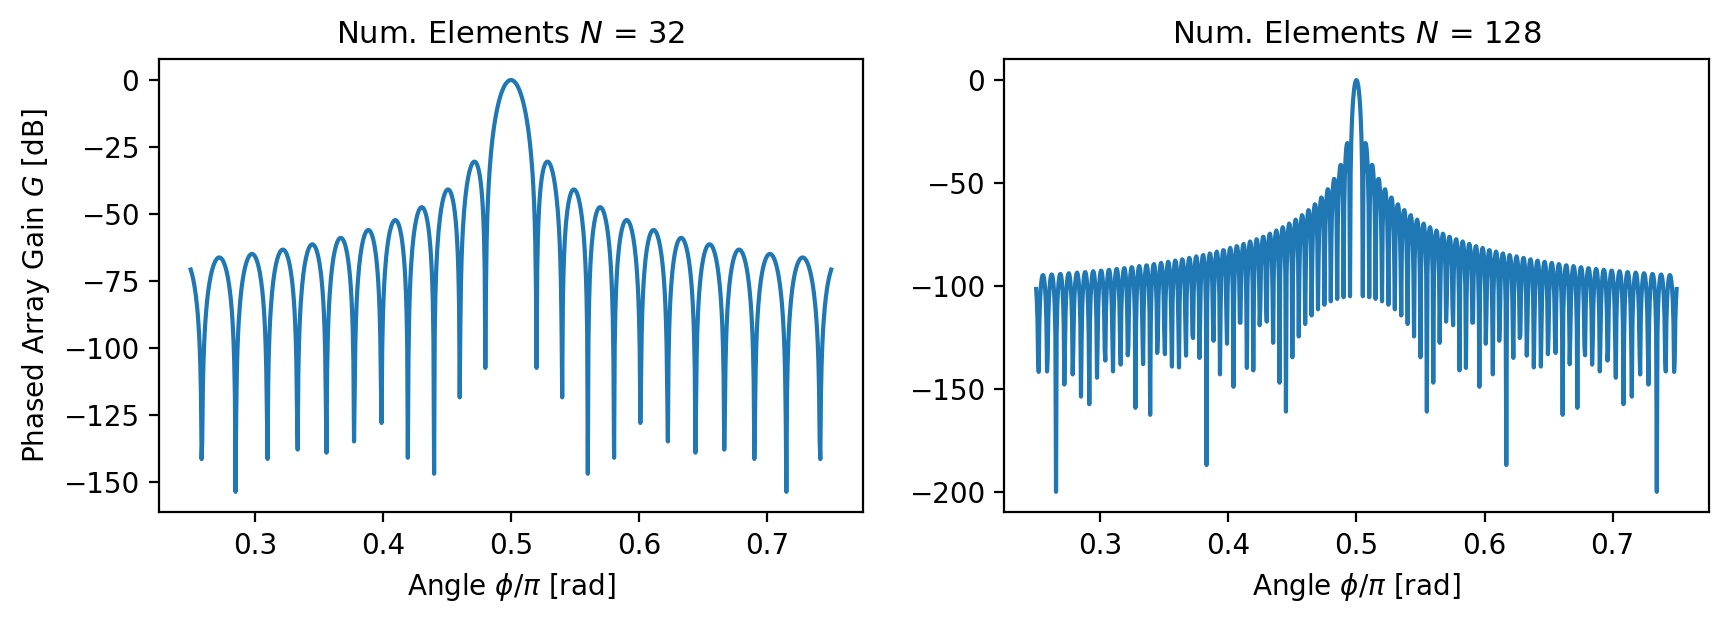

In [39]:
""" Sweep over a range [45°, 135°] """
ϕ_vals = np.linspace(π/4, 3*π/4, 1001)

""" Get normalized G values in dB and plot """
fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=200)

antenna_elements = [32, 128]
FWHMs = []

for i, N in enumerate(antenna_elements):
    G = G_dB(ϕ_vals, N = N, ka = π)
    
    FWHM = calc_FWHM(ϕ_vals, G)
    FWHMs.append(FWHM); print(f"N = {N}:", FWHM)
    
    ax[i].plot(ϕ_vals / π, G)
    ax[i].set_xlabel(r"Angle $\phi/\pi$ [rad]")
    ax[i].set_title(fr"Num. Elements $N$ = {N}", fontsize=11)
    
ax[0].set_ylabel(r"Phased Array Gain $G$ [dB]");

### (b): Effect of Antenna Spacing $a$

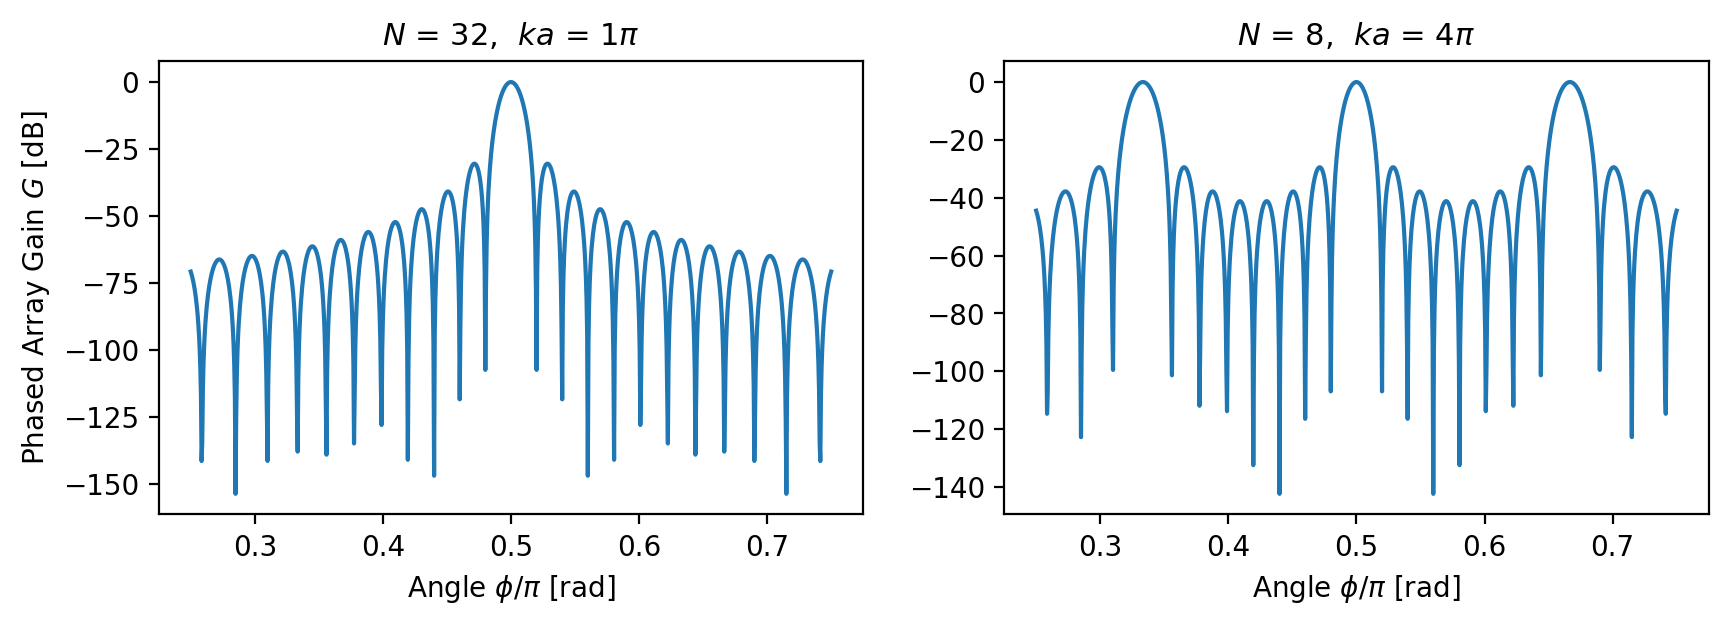

In [17]:
""" Sweep over a range [45°, 135°] """
ϕ_vals = np.linspace(π/4, 3*π/4, 1001)

""" Get normalized G values in dB and plot """
fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=200)

params_list = [[32, π, 0], [8, 4*π, 0]]

for i, params in enumerate(params_list):
    G = G_dB(ϕ_vals, *params)
    
    ax[i].plot(ϕ_vals / π, G)
    ax[i].set_xlabel(r"Angle $\phi/\pi$ [rad]")
    ax[i].set_title(fr"$N$ = {params[0]},  $ka$ = {params[1]/π:.0f}$\pi$", fontsize=11)
    
ax[0].set_ylabel(r"Phased Array Gain $G$ [dB]");



### (c): Effect of Phase Shift $\psi$ Between Antennas

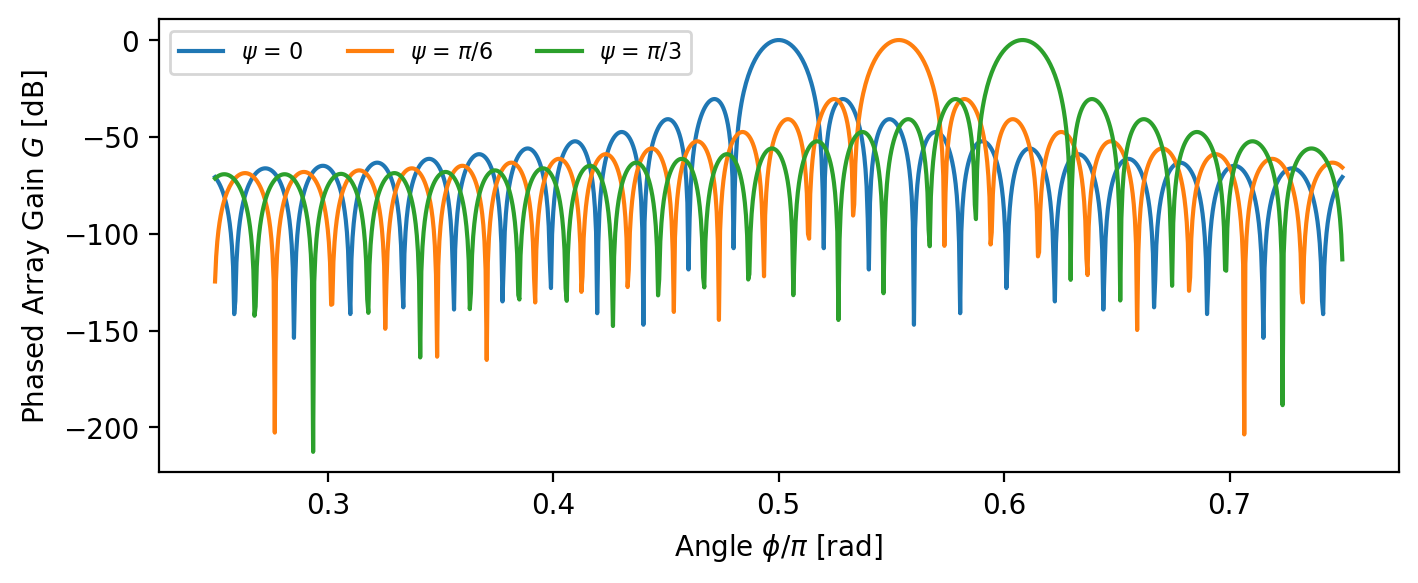

In [34]:
""" Sweep over a range [45°, 135°] """
ϕ_vals = np.linspace(π/4, 3*π/4, 1001)

""" Get normalized G values in dB and plot """
fig, ax = plt.subplots(1, 1, figsize=(8, 3), dpi=200)

ψ_list = [0, π/6, π/3]
labels = ["0", r"$\pi / 6$", r"$\pi / 3$"]

for i, ψ in enumerate(ψ_list):
    G = G_dB(ϕ_vals, N = 32, ka = π, ψ = ψ)
    
    ax.plot(ϕ_vals / π, G, label = fr"$\psi$ = {labels[i]}")

ax.set_xlabel(r"Angle $\phi/\pi$ [rad]")    
ax.set_ylabel(r"Phased Array Gain $G$ [dB]")
ax.legend(ncol=3, fontsize=8)

